In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import ks_2samp

In [2]:
def recursive_sample(df, target_n, samples, p_val_cutoff, stratified_features):
    
    # base condition
    if len(df) < target_n:
        samples.append(df)
    
    # recursion condition
    else:
        sample_size = int(len(df) // 2)
        
        while True:
            left_sample, right_sample = random_split(df, sample_size)
            ks_pvals = ks_test(left_sample, right_sample, stratified_features)
            
            if all(p_vals >= p_val_cutoff for p_vals in ks_pvals):
                print("Good split on sample size {}".format(sample_size))
                break
            
            print("Rejected split on sample size {}".format(sample_size))
            
        recursive_sample(left_sample, target_n, samples, p_val_cutoff, stratified_features)
        recursive_sample(right_sample, target_n, samples, p_val_cutoff, stratified_features)
    
    return samples

def random_split(df, sample_size):
    df_size = len(df)
    indices = random.sample(range(0, df_size), df_size)
    left_indicies = indices[sample_size:]
    right_indicies = indices[:sample_size]
    
    return df.iloc[left_indicies], df.iloc[right_indicies]

def ks_test(left_sample, right_sample, stratified_features):
    
    ks_pvals = []

    for feature in stratified_features:
        left = np.array(left_sample[feature])
        right = np.array(right_sample[feature])

        ks_result = ks_2samp(left, right)
        ks_pvals.append(ks_result[1])
    
    return ks_pvals


In [14]:
input_data_file = '../data/training_data/1992-2015_training_data_added_features.csv'
output_data_file_basename = "../data/stratified_training_data/1992-2015_training_data_added_features_"

# Datatypes for dataframe loading
dtypes={
    'lat': float,
    'lon': float,
    'weather_bin_year': int,
    'weather_bin_month': int,
    'weather_bin_day': int,
    'air.2m': float,
    'apcp': float,
    'rhum.2m': float,
    'dpt.2m': float,
    'pres.sfc': float,
    'uwnd.10m': float,
    'vwnd.10m': float,
    'veg': float,
    'vis': float,
    'ignition': float,
    'mean.air.2m': float,
    'mean.apcp': float,
    'mean.rhum.2m': float,
    'mean.dpt.2m': float,
    'mean.pres.sfc': float,
    'mean.uwnd.10m': float,
    'mean.vwnd.10m': float,
    'mean.veg': float,
    'mean.vis': float,
    'max.air.2m': float,
    'max.apcp': float,
    'max.rhum.2m': float,
    'max.dpt.2m': float,
    'max.pres.sfc': float,
    'max.uwnd.10m': float,
    'max.vwnd.10m': float,
    'max.veg': float,
    'max.vis': float,
    'min.air.2m': float,
    'min.apcp': float,
    'min.rhum.2m': float,
    'min.dpt.2m': float,
    'min.pres.sfc': float,
    'min.uwnd.10m': float,
    'min.vwnd.10m': float,
    'min.veg': float,
    'min.vis': float,
    'total_fires': float
}

# Pick features to stratify
stratified_features = [
    'lat',
    'lon',
    'weather_bin_year',
    'weather_bin_month',
    'air.2m',
    'apcp',
    'rhum.2m',
    'dpt.2m',
    'pres.sfc',
    'uwnd.10m',
    'vwnd.10m',
    'veg',
    'vis',
    'ignition',
    'mean.air.2m',
    'mean.apcp',
    'mean.rhum.2m',
    'mean.dpt.2m',
    'mean.pres.sfc',
    'mean.uwnd.10m',
    'mean.vwnd.10m',
    'mean.veg',
    'mean.vis',
    'max.air.2m',
    'max.apcp',
    'max.rhum.2m',
    'max.dpt.2m',
    'max.pres.sfc',
    'max.uwnd.10m',
    'max.vwnd.10m',
    'max.veg',
    'max.vis',
    'min.air.2m',
    'min.apcp',
    'min.rhum.2m',
    'min.dpt.2m',
    'min.pres.sfc',
    'min.uwnd.10m',
    'min.vwnd.10m',
    'min.veg',
    'min.vis',
    'total_fires'
]

# Pick features to include in output samples
output_features = [
    'lat',
    'lon',
    'weather_bin_year',
    'weather_bin_month',
    'weather_bin_day',
    'air.2m',
    'apcp',
    'rhum.2m',
    'dpt.2m',
    'pres.sfc',
    'uwnd.10m',
    'vwnd.10m',
    'veg',
    'vis',
    'ignition',
    'mean.air.2m',
    'mean.apcp',
    'mean.rhum.2m',
    'mean.dpt.2m',
    'mean.pres.sfc',
    'mean.uwnd.10m',
    'mean.vwnd.10m',
    'mean.veg',
    'mean.vis',
    'max.air.2m',
    'max.apcp',
    'max.rhum.2m',
    'max.dpt.2m',
    'max.pres.sfc',
    'max.uwnd.10m',
    'max.vwnd.10m',
    'max.veg',
    'max.vis',
    'min.air.2m',
    'min.apcp',
    'min.rhum.2m',
    'min.dpt.2m',
    'min.pres.sfc',
    'min.uwnd.10m',
    'min.vwnd.10m',
    'min.veg',
    'min.vis',
    'total_fires'
]

# Split until sample is less than or equal to target
target_n = 500000

# For a sucessfull split, each variable must have a KS test p-value
# equal to or greater than the cutoff
p_val_cutoff = 0.4

In [15]:
# Read in and prep data
master_df = pd.read_csv(input_data_file)
master_df = master_df[output_features]

In [ ]:
samples = []
samples = recursive_sample(master_df, target_n, samples, p_val_cutoff, stratified_features)

Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected spl

Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected spl

Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected spl

Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected split on sample size 1797030
Rejected spl

Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
R

Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
R

Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
R

Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
R

Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
R

Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
Rejected split on sample size 898515
R

In [10]:
i = 1
for sample in samples:
    output_file_name = output_data_file_basename+"n"+str(target_n)+"_ks_pval"+str(p_val_cutoff)+"."+str(i)+".csv"
    sample.to_csv(output_file_name, index=False)
    
    i += 1

In [11]:
# Distribution plotting variables

left  = 0.125  # the left side of the subplots of the figure
right = 0.65   # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

fig_rows = 5
fig_cols = 3
plot_height = 30
plot_width = 30

plot_locations = [
    (0,0),(0,1),(0,2),
    (1,0),(1,1),(1,2),
    (2,0),(2,1),(2,2),
    (3,0),(3,1),(3,2),
    (4,0)
]

data_types = [
    'weather_bin_month',
    'weather_bin_year',
    'air.2m',
    'apcp',
    'rhum.2m',
    'dpt.2m',
    'pres.sfc',
    'uwnd.10m', 
    'vwnd.10m',
    'veg',
    'vis',
    'lat',
    'lon'
]

plot_titles = [
    'Month',
    'Year',
    'Surface air temperature',
    'Acumulated precipitation',
    'Relative humidity',
    'Dew point',
    'Surface pressure',
    'U-component of wind', 
    'V-component of wind',
    'Vegitation coverage',
    'Visibility',
    'Latitude',
    'Longitude'
]

weather_variable_labels = [
    'Month',
    'Year',
    'Temp.',
    'Precipitation',
    'Humidity',
    'Dew point',
    'Pressure',
    'Speed',
    'Speed',
    'Percent',
    'Distance',
    'Degrees',
    'Degrees'
]

y_scales = [
    'linear',
    'linear',
    'linear',
    'log',
    'linear',
    'linear',
    'linear',
    'linear',
    'linear',
    'linear',
    'linear',
    'linear',
    'linear'
]

xlabels = weather_variable_labels
ylabels = ['Fraction observations'] * len(xlabels)

In [12]:
def two_sample_density_plot(
    plot_location, 
    parent_data, 
    sample_data, 
    data_type, 
    title, 
    xlabel, 
    ylabel, 
    y_scale
):
    parent_values, parent_base = np.histogram(parent_data[data_type], bins=40)
    sample_values, sample_base = np.histogram(sample_data[data_type], bins=40)
    
    parent_cumulative = np.cumsum(parent_values) / len(parent_data)
    sample_cumulative = np.cumsum(sample_values) / len(sample_data)

    ax[plot_location].plot(parent_base[:-1], (parent_values/len(parent_data)))
    ax[plot_location].plot(sample_base[:-1], (sample_values/len(sample_data)))
    ax[plot_location].tick_params(labelsize=12)
    ax[plot_location].set_title(title, fontsize=18)
    ax[plot_location].set_xlabel(xlabel, fontsize=14)
    ax[plot_location].set_ylabel(ylabel, fontsize=15)
    ax[plot_location].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[plot_location].set_yscale(y_scale)

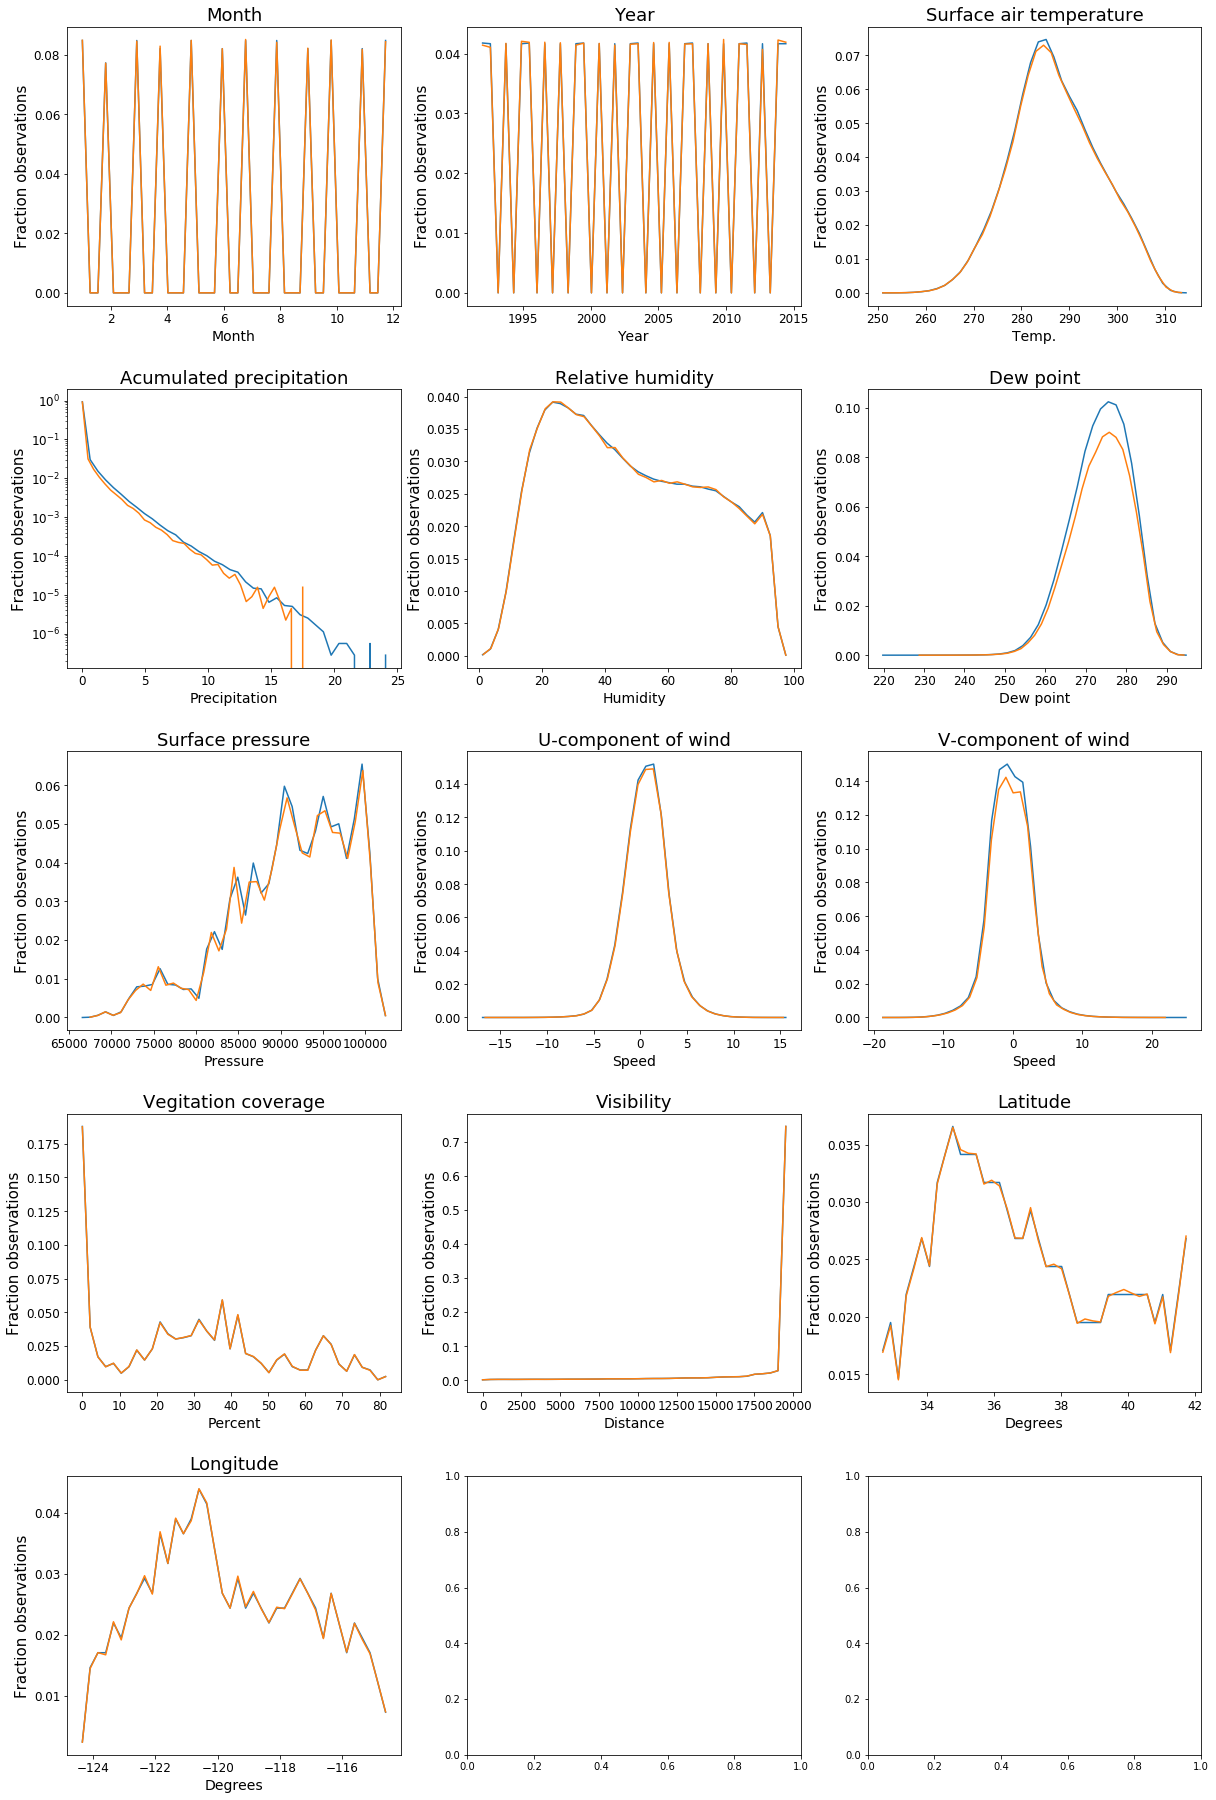

In [13]:
# Make density plots
fig, ax = plt.subplots(fig_rows, fig_cols, figsize=(plot_width, plot_height))
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)

for i in range(len(plot_locations)):
    ax[plot_locations[i]] = two_sample_density_plot(plot_locations[i], master_df, samples[2], data_types[i], plot_titles[i], xlabels[i], ylabels[i], y_scales[i])
    
plt.show()